<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/Multi_layer_Perceptron_MLP/ANN_carvao_NetCal_load_model_maio_02_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bibliotecas usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.metrics import r2_score 
from sklearn.externals import joblib
from google.colab import files

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
# para gerar o grafico no browser
%matplotlib inline

In [3]:
!git clone https://github.com/ucfilho/ANN_2021_01/
%cd ANN_2021_01

fatal: destination path 'ANN_2021_01' already exists and is not an empty directory.
/content/ANN_2021_01


In [4]:
# leitura dos dados
df=pd.read_csv("Paper_Carvao_China_abril_12_2016.csv")
print(df.head())

   Unnamed: 0 Cod  Water    Ash  Volatil  ...  Nitro  Sulfur  Oxygen   TC     Ea
0           1  LL   4.19  19.45    33.19  ...   1.02    4.38    7.66  435  170.1
1           2  YY   1.06  20.46    31.53  ...   1.38    0.74    7.51  451  206.6
2           3  SF   6.60   9.56    31.49  ...   0.95    0.38   12.56  431  273.5
3           4  YM   9.47  14.19    30.02  ...   0.83    0.44   13.71  403  160.8
4           5  ZZ   1.84  18.10    29.43  ...   1.22    0.88    8.02  466  228.4

[5 rows x 14 columns]


In [5]:
filename = 'model_ANN.pkl'
model = joblib.load(filename)

In [6]:
df.head(3)

,Unnamed: 0,Cod,Water,Ash,Volatil,FixC,NetCal,Carbon,Hydrog,Nitro,Sulfur,Oxygen,TC,Ea
0,1,LL,4.19,19.45,33.19,43.17,23.91,59.22,4.08,1.02,4.38,7.66,435,170.1
1,2,YY,1.06,20.46,31.53,46.94,23.91,64.22,4.63,1.38,0.74,7.51,451,206.6
2,3,SF,6.60,9.56,31.49,52.35,26.22,66.34,3.61,0.95,0.38,12.56,431,273.5


In [7]:
df.tail(3)

,Unnamed: 0,Cod,Water,Ash,Volatil,FixC,NetCal,Carbon,Hydrog,Nitro,Sulfur,Oxygen,TC,Ea
61,62,YM4LA4JC2,5.70,16.22,19.05,59.03,25.28,66.86,3.32,1.16,0.39,6.35,408,176.4
62,63,YY2HN4LQ4,2.02,20.02,19.57,58.40,25.26,66.78,3.62,1.17,0.54,5.85,475,252.4
63,64,YY2PX2LA6,2.05,19.30,17.23,61.42,26.70,68.15,3.50,1.23,0.62,5.15,481,256.0


In [8]:
# separa as colunas de interesse

Index=[2,3,4,5]
X=df.iloc[:,Index].copy()
print(X.head())


   Water    Ash  Volatil   FixC
0   4.19  19.45    33.19  43.17
1   1.06  20.46    31.53  46.94
2   6.60   9.56    31.49  52.35
3   9.47  14.19    30.02  46.32
4   1.84  18.10    29.43  50.63


In [9]:
Index=[ 'NetCal']
y =df[Index]

In [10]:
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)
scaler_Y = preprocessing.MinMaxScaler((-1,1)).fit(y)

In [11]:
X = scaler_X.transform(X)
y = scaler_Y.transform(y)

In [12]:
# usa a rede neural treina em calculos para treino e teste
y_calc = model.predict(X)

In [13]:
# transforma dos dados calculados na forma original (nao normatizado)
y_obs = scaler_Y.inverse_transform(np.array(y).reshape(-1,1))
y_calc = scaler_Y.inverse_transform(y_calc.reshape(-1,1))

In [14]:
print(pd.DataFrame({'test calc':y_calc.ravel(),'test true':y_obs.ravel()}))

    test calc  test true
0   23.845842      23.91
1   23.980729      23.91
2   26.230157      26.22
3   23.767939      23.80
4   27.641110      27.73
..        ...        ...
59  22.239594      22.46
60  25.622517      26.11
61  25.207762      25.28
62  25.727580      25.26
63  26.092435      26.70

[64 rows x 2 columns]


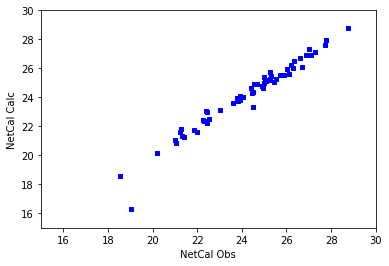

In [15]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(y_obs,y_calc, s=10, c='b', marker="s")
plt.xlim([15,30])
plt.ylim([15,30])
plt.ylabel('NetCal Calc')
plt.xlabel('NetCal Obs')
plt.show()

In [16]:
mse=mean_squared_error(y_obs,y_calc)
print("MSE teste=",mse)
R2=r2_score(y_obs,y_calc)
print("R^2 teste=",R2)

MSE teste= 0.19205025155105335
R^2 teste= 0.9628149879423675
